In [3]:
import pandas as pd
import os
import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')

import scipy.stats as stats

In [4]:
n_bs = 5000

full_data = []
# for n in [100,200,500,1000]:
for n in [10,20,50,100,250]:
    for u in np.arange(-2,2,.1):
        count_suc5 = 0
        count_suc05 = 0
        for ii in range(n_bs): 
            data = np.random.normal(u,1,n)

            p = stats.ttest_1samp(data,0).pvalue
            if p<=.05:
                count_suc5+=1
            if p<=.005:
                count_suc05+=1

        full_data.append({'mean':u,'n':n,'suc5':count_suc5/n_bs,'suc05':count_suc05/n_bs})

In [5]:
df = pd.DataFrame(full_data)

Text(0.5, 0, 'real mean')

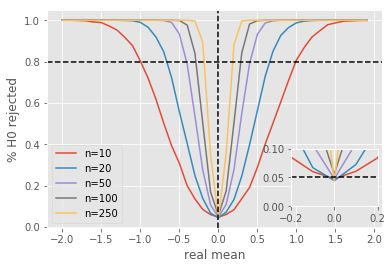

In [6]:
ns = df['n'].unique()

fig,ax1 = plt.subplots()
left, bottom, width, height = [0.69, 0.2, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_xlim(-.2,.2)
ax2.set_ylim(0,.1)

for nn in ns:
    df2 = df[df['n']==nn]
    ax1.plot(df2['mean'],df2['suc5'],label='n='+str(nn))
    ax2.plot(df2['mean'],df2['suc5'],label='n='+str(nn))
    
ax1.axvline(0,ls='--',c='k')
ax1.axhline(0.8,ls='--',c='k')
# ax1.axhline(0.05,ls='--',c='k')
ax2.axhline(0.05,ls='--',c='k')
ax1.legend()
ax1.set_ylabel('% H0 rejected')
ax1.set_xlabel('real mean')


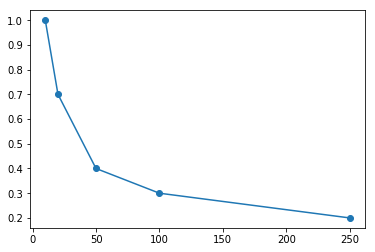

In [94]:
temp_val = []
for nn in ns:
    df2 = df[df['n']==nn]
    crit_val = df2[(df2['suc5']>.80)&(df2['mean']>0)].iloc[0]['mean']
    temp_val.append( {'n':nn,'crit_val':crit_val} )

crit_df = pd.DataFrame(temp_val)

plt.plot(crit_df['n'],crit_df['crit_val'],marker='o')

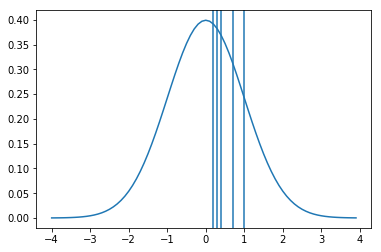

In [95]:
xx = np.arange(-4,4,.1)

plt.plot(xx, [stats.norm.pdf(x,0,1) for x in xx])
for crit in crit_df['crit_val'].tolist():
#     plt.plot(xx, [stats.norm.pdf(x,crit,2) for x in xx])
    plt.axvline(crit)

Text(0, 0.5, '% H0 rejected')

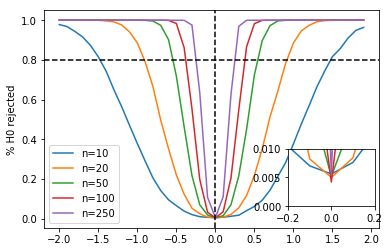

In [96]:
ns = df['n'].unique()

fig,ax1 = plt.subplots()
left, bottom, width, height = [0.69, 0.2, 0.2, 0.2]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_xlim(-.2,.2)
ax2.set_ylim(0,.01)

for nn in ns:
    df2 = df[df['n']==nn]
    ax1.plot(df2['mean'],df2['suc05'],label='n='+str(nn))
    ax2.plot(df2['mean'],df2['suc05'],label='n='+str(nn))
    
ax1.axvline(0,ls='--',c='k')
ax1.axhline(0.8,ls='--',c='k')
ax1.legend()
ax1.set_ylabel('% H0 rejected')

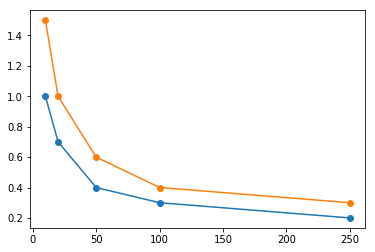

In [98]:
temp_val = []
for nn in ns:
    df2 = df[df['n']==nn]
    crit_val5 = df2[(df2['suc5']>.80)&(df2['mean']>0)].iloc[0]['mean']
    crit_val05 = df2[(df2['suc05']>.80)&(df2['mean']>0)].iloc[0]['mean']
    temp_val.append( {'n':nn,'crit_val':crit_val5,'crit_val2':crit_val05} )

crit_df = pd.DataFrame(temp_val)

plt.plot(crit_df['n'],crit_df['crit_val'],marker='o')
plt.plot(crit_df['n'],crit_df['crit_val2'],marker='o')

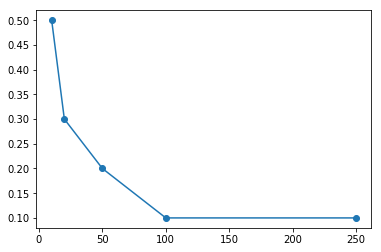

In [99]:
plt.plot(crit_df['n'],crit_df['crit_val2']-crit_df['crit_val'],marker='o')
